In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.preprocessing import LabelEncoder

In [ ]:
df = pd.read_csv('/content/drive/My Drive/datasets/IMDB Dataset.csv')

In [ ]:
print(df.head())

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [ ]:
# Convert 'sentiment' to numerical values (positive = 1, negative = 0)
encoder = LabelEncoder()
df['sentiment'] = encoder.fit_transform(df['sentiment'])

In [ ]:
X = df['review'].values
y = df['sentiment'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
max_words = 10000  # Maximum number of words to consider
max_len = 150  # Maximum length of input sequences

In [ ]:
# Tokenizer to convert text to sequences of tokens
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)

In [ ]:
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

In [ ]:
# Pad the sequences to ensure uniform input size
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

In [ ]:
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len))
model.add(SpatialDropout1D(0.2))  # Dropout to prevent overfitting
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))  # LSTM layer
model.add(Dense(1, activation='sigmoid'))  # Output layer with sigmoid activation

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train_pad, y_train, epochs=5, batch_size=64, validation_data=(X_test_pad, y_test), verbose=2)

Epoch 1/5
625/625 - 116s - 186ms/step - accuracy: 0.7972 - loss: 0.4460 - val_accuracy: 0.8599 - val_loss: 0.3360
Epoch 2/5
625/625 - 114s - 182ms/step - accuracy: 0.8690 - loss: 0.3217 - val_accuracy: 0.8404 - val_loss: 0.3588
Epoch 3/5
625/625 - 116s - 185ms/step - accuracy: 0.8834 - loss: 0.2943 - val_accuracy: 0.8720 - val_loss: 0.3134
Epoch 4/5
625/625 - 140s - 223ms/step - accuracy: 0.9046 - loss: 0.2449 - val_accuracy: 0.8747 - val_loss: 0.3052
Epoch 5/5
625/625 - 143s - 229ms/step - accuracy: 0.9166 - loss: 0.2138 - val_accuracy: 0.8795 - val_loss: 0.3133


In [ ]:
loss, accuracy = model.evaluate(X_test_pad, y_test)
print(f"Test accuracy: {accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 64ms/step - accuracy: 0.8789 - loss: 0.3066
Test accuracy: 0.8795


In [ ]:
predictions = model.predict(X_test_pad)
predictions = (predictions > 0.5).astype(int)  # Convert to binary (0 or 1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 67ms/step


In [ ]:
for i in range(5):
    print(f"Review: {X_test[i]}")
    print(f"Predicted Sentiment: {'Positive' if predictions[i] == 1 else 'Negative'}")
    print("---")

Review: I really liked this Summerslam due to the look of the arena, the curtains and just the look overall was interesting to me for some reason. Anyways, this could have been one of the best Summerslam's ever if the WWF didn't have Lex Luger in the main event against Yokozuna, now for it's time it was ok to have a huge fat man vs a strong man but I'm glad times have changed. It was a terrible main event just like every match Luger is in is terrible. Other matches on the card were Razor Ramon vs Ted Dibiase, Steiner Brothers vs Heavenly Bodies, Shawn Michaels vs Curt Hening, this was the event where Shawn named his big monster of a body guard Diesel, IRS vs 1-2-3 Kid, Bret Hart first takes on Doink then takes on Jerry Lawler and stuff with the Harts and Lawler was always very interesting, then Ludvig Borga destroyed Marty Jannetty, Undertaker took on Giant Gonzalez in another terrible match, The Smoking Gunns and Tatanka took on Bam Bam Bigelow and the Headshrinkers, and Yokozuna defe

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

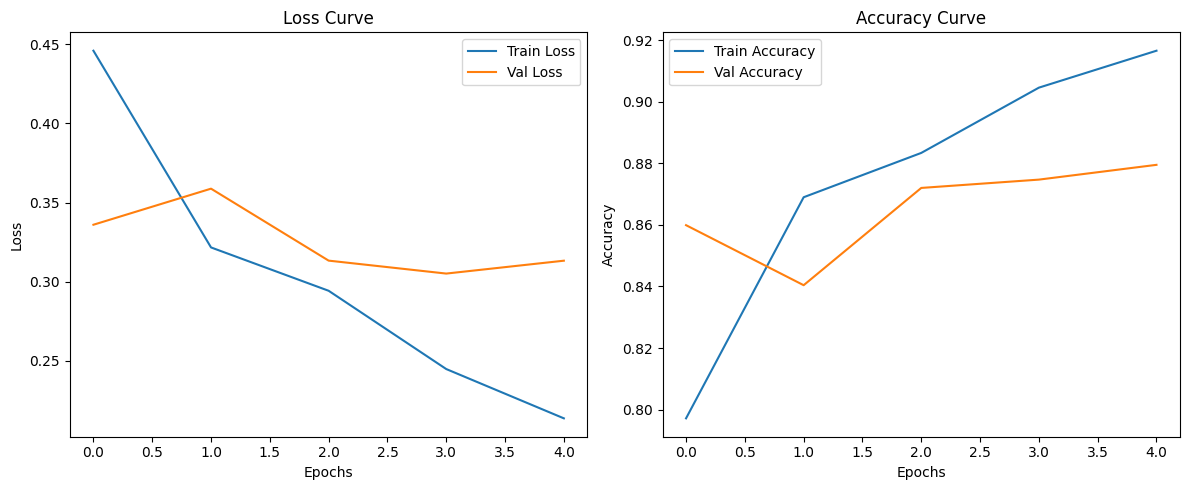

In [ ]:
# Plot the training and validation loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
y_pred = (model.predict(X_test_pad) > 0.5).astype(int)  # Predictions

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

313/313 ━━━━━━━━━━━━━━━━━━━━ 19s 62ms/step


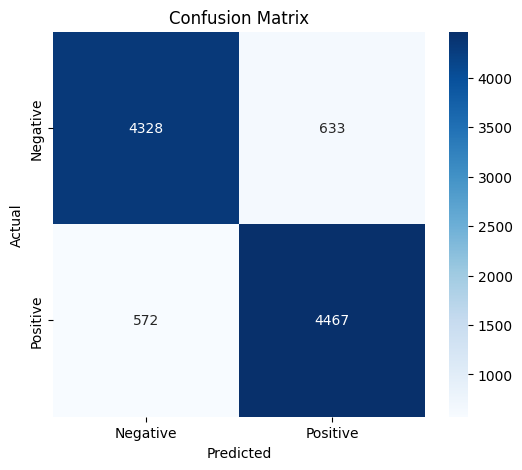

In [ ]:
# Plot confusion matrix as a heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))

Classification Report:
              precision    recall  f1-score   support

    Negative       0.88      0.87      0.88      4961
    Positive       0.88      0.89      0.88      5039

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 66ms/step


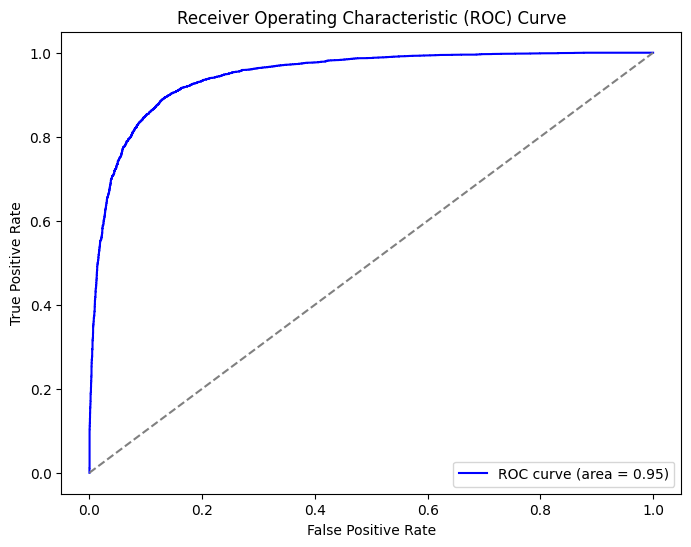

In [ ]:
# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, model.predict(X_test_pad))
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

In [ ]:
def predict_sentiment(review, model, tokenizer, max_len):
    # Preprocess the review text (tokenization and padding)
    review_seq = tokenizer.texts_to_sequences([review])
    review_pad = pad_sequences(review_seq, maxlen=max_len)

    # Make the prediction
    prediction = model.predict(review_pad)

    # Return the sentiment based on the model's output
    if prediction >= 0.5:
        return "Positive Review"
    else:
        return "Negative Review"

In [ ]:
review1 = "The movie had its moments, but the story felt predictable and the pacing was off. Not terrible, but not great either."
sentiment = predict_sentiment(review1, model, tokenizer, max_len)
print(f"Prediction: {sentiment}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
Prediction: Negative Review


In [ ]:
review2 = "There were a few things that didn't quite align, but overall, it was an experience I'll remember fondly. It may not be perfect, but it's definitely worth the watch."
sentiment = predict_sentiment(review2, model, tokenizer, max_len)
print(f"Prediction: {sentiment}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
Prediction: Positive Review


In [ ]:
import pickle

# Assuming 'tokenizer' is your trained tokenizer (e.g., the one you used to train your model)
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
model.save('movie_review_sentiment_model.h5')

In [ ]:
from google.colab import files

# Download the saved model file
files.download('movie_review_sentiment_model.h5')

In [ ]:
# Download the saved tokenizer file
files.download('tokenizer.pickle')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# TO DO : don't user LSTM, Perform using Deep Learning Only